[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MauricioRR-Tec/AprendizajeAutomatico/blob/master/Tema_4_AprendizajeAutomatico/notebook/ML_03_SVM.ipynb)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

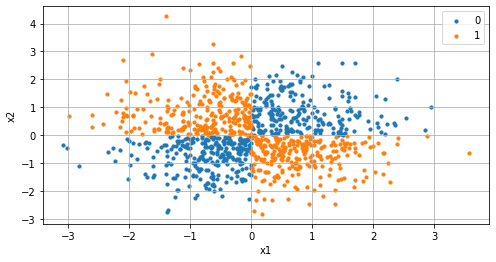

In [2]:
# Create a XOR dataset
X = np.random.randn(1000, 2)
Y = np.array([int(np.logical_xor(x[0] > 0, x[1] > 0)) for x in X])

plt.figure(figsize=(8, 4))
plt.scatter(X[Y==0, 0], X[Y==0, 1], s=10, label='0')
plt.scatter(X[Y==1, 0], X[Y==1, 1], s=10, label='1')
plt.legend()
plt.grid(True)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [3]:
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(720, 2)
(80, 2)
(200, 2)
(720,)
(80,)
(200,)


# Part 2: Classification

In [4]:
# Create a linear SVM and train it
lin_svm = SVC(kernel='linear')
lin_svm.fit(x_train, y_train)

# Print performance
print(f"Training mean accuracy: {lin_svm.score(x_train, y_train):6.4f}")
print(f"Test mean accuracy: {lin_svm.score(x_val, y_val):6.4f}")

Training mean accuracy: 0.5167
Test mean accuracy: 0.5250


In [5]:
# Encuentra el mejor SVM utilizando grid search
# Guíate por el desempeño en el set de entrenamiento y validación.
# Prueba los siguientes hyperparámetros.
# kernel = linear, polynomial, rbf
# C = 0.01, 0.1, 1.0, 10, 100
# grado del polinomio = 1, 2, 3, 4 (solo para el kernel polinomial)
# gamma = auto, scale

In [6]:
# Define grid search parameters
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ('linear', 'poly', 'rbf'),
              'degree': [1, 2, 3, 4], 'gamma': ('auto', 'scale')}
param_grid

{'C': [0.01, 0.1, 1, 10, 100],
 'kernel': ('linear', 'poly', 'rbf'),
 'degree': [1, 2, 3, 4],
 'gamma': ('auto', 'scale')}

In [7]:
# Create and train the classifiers with grid search
svc = SVC()
clf = GridSearchCV(svc, param_grid)
clf.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4],
                         'gamma': ('auto', 'scale'),
                         'kernel': ('linear', 'poly', 'rbf')})

In [8]:
# Print info about best score and best hyperparameters
print(f"Best score: {clf.best_score_:.4f}")
print(f"Best params: {clf.best_params_}")

Best score: 0.9917
Best params: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'poly'}


In [9]:
# Evaluate on the test set
best_svm = SVC(C=100, kernel='poly', degree=2, gamma='auto')
best_svm.fit(x_train, y_train)

print(f"Train mean accuracy: {best_svm.score(x_train, y_train):6.4f}")
print(f"Validation mean accuracy: {best_svm.score(x_val, y_val):6.4f}")
print(f"Test mean accuracy: {best_svm.score(x_test, y_test):6.4f}")

Train mean accuracy: 0.9944
Validation mean accuracy: 0.9875
Test mean accuracy: 1.0000
